In [710]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import theano
import keras
import scipy
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [711]:
colnames=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] 
data = pd.read_csv('housing.data',names=colnames, sep=r"\s+" )
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [712]:
MEDV = data['MEDV']
houses= MEDV.shape[0]
mini = np.amin(MEDV)*1000
maxi = np.amax(MEDV)*1000
mean = np.mean(MEDV)*1000
print("Number of instances in the data: {}".format(houses))
print("The lowest price: ${}".format(round(mini)))
print("The highest price: ${}".format(round(maxi)))
print("The average price: ${}".format(round(mean)))


Number of instances in the data: 506
The lowest price: $5000
The highest price: $50000
The average price: $22533


# Check how each feature correlates with MEDV using a heatmap
### The heatmap shows that the four features with correlations closest to 0 (poorest correlation) are:
### - the Charles River dummy variable (correlation = 0.18)
### - the weighted distances to five Boston employment centres (correlation = 0.25)
### - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (correlation = 0.33)
### - the proportion of residential land zoned for lots over 25,000 sq.ft (correlation = 0.36)


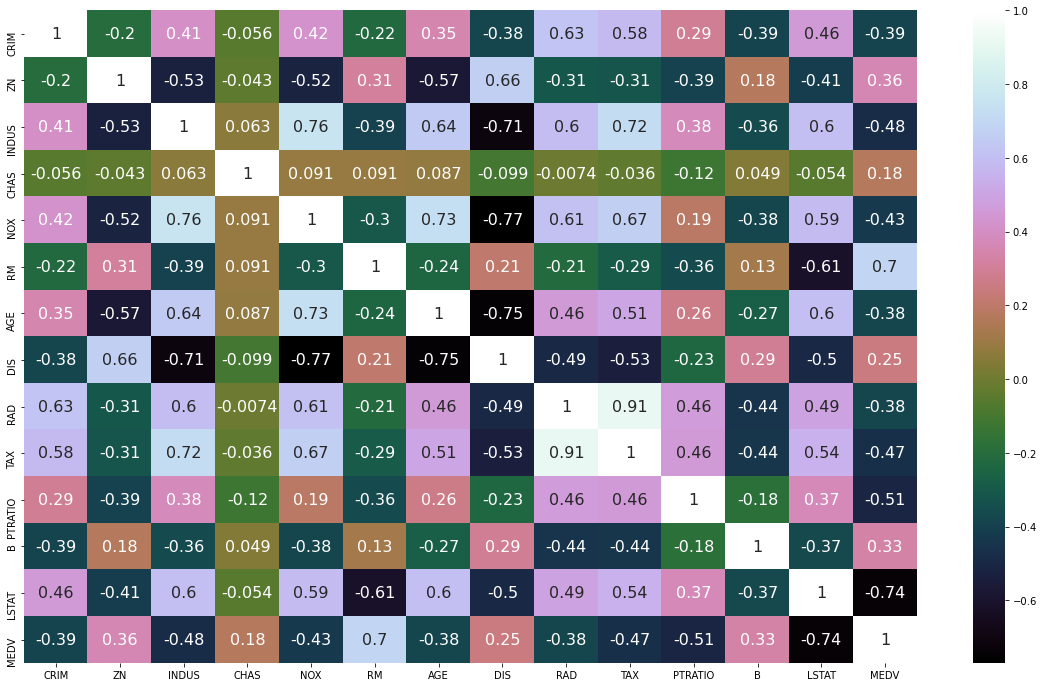

In [713]:
plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(), cmap="cubehelix",annot_kws={"size": 16}, annot=True )

plt.show()

In [714]:
# drop these features from the dataset
data.drop(labels=["ZN", "CHAS", "DIS", "B"],axis=1, inplace=True)
print("Processed data:")
data.head()

Processed data:


,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,1,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,2,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,2,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,3,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,3,222.0,18.7,5.33,36.2


# Create train and test set and split into features and MEDV

In [715]:
#split into train and test set
train, test = train_test_split(data, test_size=0.2)

#create numpy matrix, and spilit into features and MEDV
numpydata= train.to_numpy()
train_features=numpydata[:,0:-1]
train_MEDV=numpydata[:,-1]

numpydata= test.to_numpy()
test_features=numpydata[:,0:-1]
test_MEDV=numpydata[:,-1]

In [716]:
# define the keras model

model = Sequential()
model.add(Dense(13, input_dim=train_features.shape[1], activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='linear'))

In [717]:
# loss function: mean squared error
#metrics: mean suared error, mean absolute error, mean absolute percentage error
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])

Epoch 1/800
5/5 [==============================] - 0s 1ms/step - loss: 240.7349 - mse: 240.7349 - mae: 12.7621 - mape: 66.2643
Epoch 2/800
5/5 [==============================] - 0s 1ms/step - loss: 207.4020 - mse: 207.4020 - mae: 11.8415 - mape: 61.9306
Epoch 3/800
5/5 [==============================] - 0s 1ms/step - loss: 221.1338 - mse: 221.1338 - mae: 12.1710 - mape: 64.1421
Epoch 4/800
5/5 [==============================] - 0s 1ms/step - loss: 221.4889 - mse: 221.4889 - mae: 12.2446 - mape: 63.4499
Epoch 5/800
5/5 [==============================] - 0s 1ms/step - loss: 201.0401 - mse: 201.0401 - mae: 11.6690 - mape: 60.8328
Epoch 6/800
5/5 [==============================] - 0s 1ms/step - loss: 196.9034 - mse: 196.9034 - mae: 11.4633 - mape: 58.9509
Epoch 7/800
5/5 [==============================] - 0s 1ms/step - loss: 211.8323 - mse: 211.8323 - mae: 11.6296 - mape: 57.6405
Epoch 8/800
5/5 [==============================] - 0s 1ms/step - loss: 190.4381 - mse: 190.4381 - mae: 11.2941 

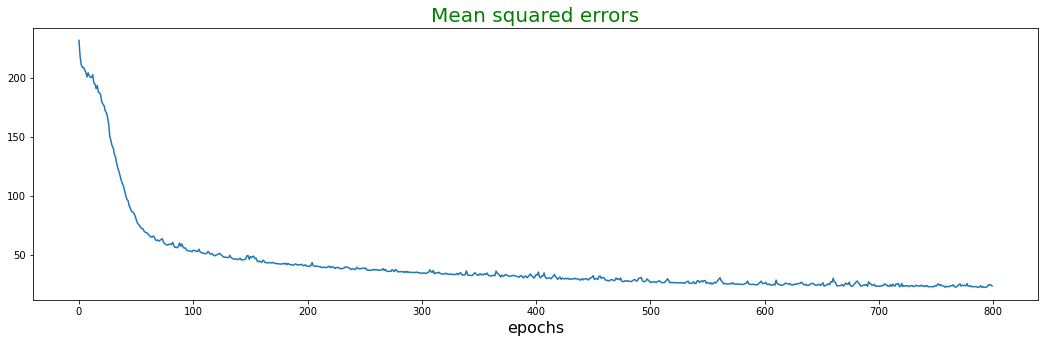

In [718]:
trained_model= model.fit(train_features, train_MEDV, epochs=800, batch_size=81)
print()

plt.subplots(figsize=(18,5))
plt.plot(trained_model.history['mse'])
plt.title("Mean squared errors", fontsize=20,color="green")
plt.xlabel('epochs', fontsize=16)
plt.show()

# Evaluation of the model
### The test set is used to evaluate the accuracy of the model
### The bar plot shows the predicted values in blue, and the actual values of MEDV in orange
### The error plot shows the errors of each predicted value (in $1000's)

4/4 [==============================] - 0s 1ms/step - loss: 18.7225 - mse: 18.7225 - mae: 3.1795 - mape: 14.8806


Mean squared error in predictions: 18.72
Average prediction accuracy: 85.1%


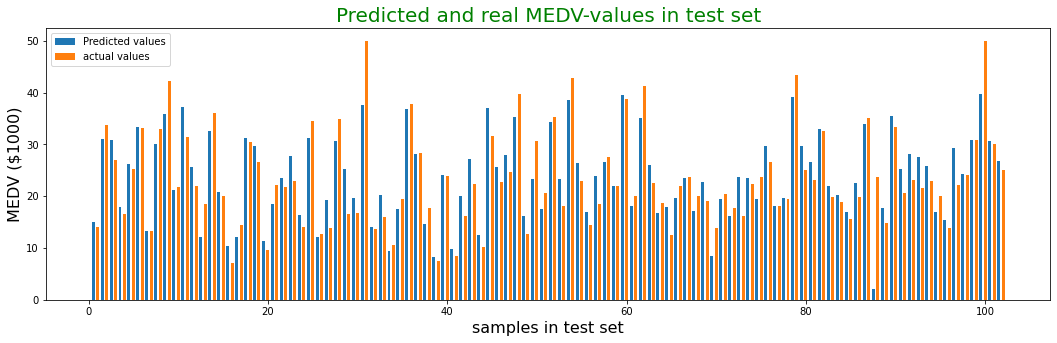

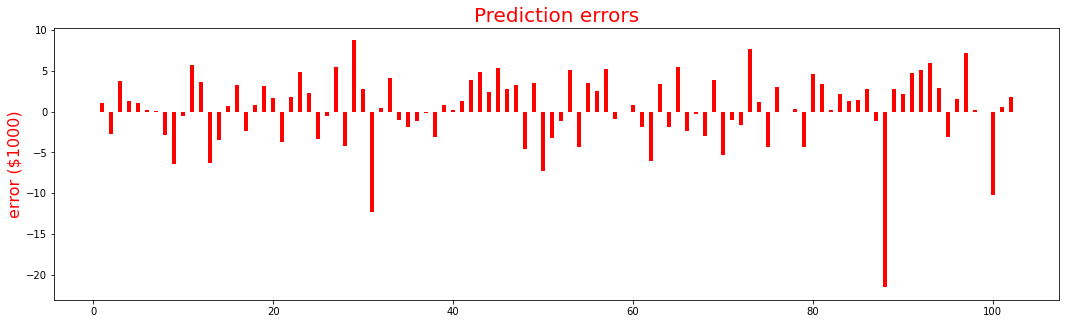

In [719]:
accuracy = model.evaluate(test_features, test_MEDV)

predictiondata = pd.DataFrame(model.predict(test_features), columns=["pred"])
predictiondata["MEDV"] =test_MEDV
predictiondata["error"] = predictiondata["pred"]-predictiondata["MEDV"]
predictiondata["squared_error"]= predictiondata["error"]**2
predictiondata["error_percentage"]= (((abs(predictiondata["error"]))/predictiondata["MEDV"])*100)
print()
print()
print("\033[1mMean squared error in predictions: %.2f"%accuracy[0])
print("Average prediction accuracy: %.1f"%(100-predictiondata["error_percentage"].mean())+"%\033[0m")

plt.subplots(figsize=(18,5))
#plt.bar(range(1,len(test_MEDV)+1), model.predict(test_features).reshape(test_MEDV.shape), width=0.4)
#plt.bar(range(1,len(test_MEDV)+1)+0.2,test_MEDV, width=0.3)
plt.bar(predictiondata.index.values+0.5, predictiondata["pred"], width=0.333)
plt.bar(predictiondata.index.values+1, predictiondata["MEDV"], width=0.333)
plt.title('Predicted and real MEDV-values in test set',color="green",fontsize=20)
plt.xlabel('samples in test set', fontsize=16)
plt.ylabel('MEDV ($1000)', fontsize=16)
plt.legend(['Predicted values', 'actual values'])
plt.show()
print()
print()
plt.subplots(figsize=(18,5))
plt.title('Prediction errors',color="red",fontsize=20)
plt.ylabel('error ($1000)', color="red", fontsize=16)
plt.bar(predictiondata.index.values+1, predictiondata["error"],color="red", width=0.5)
plt.show()

